In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [ ]:
df = pd.read_csv('/content/adbrew_assignment_data.csv')
df.head(10)

spend  clicks  impressions  sales  orders          dt           id
0    0.0       0            1    0.0       0  2022-07-24  60168165092
1    0.0       0            7    0.0       0  2022-07-29  60168165092
2    0.0       0            1    0.0       0  2022-07-30  60168165092
3    0.0       0            1    0.0       0  2022-08-01  60168165092
4    0.0       0            1    0.0       0  2022-08-03  60168165092
5    0.0       0            1    0.0       0  2022-08-10  60168165092
6    0.0       0            0    0.0       0  2022-08-12  60168165092
7    0.0       0            0    0.0       0  2022-08-13  60168165092
8    0.0       0            0    0.0       0  2022-08-14  60168165092
9    0.0       0            2    0.0       0  2022-08-16  60168165092

In [ ]:
df.shape

(266273, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266273 entries, 0 to 266272
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   spend        266273 non-null  float64
 1   clicks       266273 non-null  int64  
 2   impressions  266273 non-null  int64  
 3   sales        266273 non-null  float64
 4   orders       266273 non-null  int64  
 5   dt           266273 non-null  object 
 6   id           266273 non-null  int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 14.2+ MB


In [ ]:
def dataoveriew(df, message):
    print(f'{message}:\n')
    print('Number of rows: ', df.shape[0])
    print("\nNumber of features:", df.shape[1])
    print("\nData Features:")
    print(df.columns.tolist())
    print("\nMissing values:")
    print(dict(df.isnull().sum()))
    print("\nUnique values:")
    print(dict(df.nunique()))

dataoveriew(df, 'Overview of the dataset')

Overview of the dataset:

Number of rows:  266273

Number of features: 7

Data Features:
['spend', 'clicks', 'impressions', 'sales', 'orders', 'dt', 'id']

Missing values:
{'spend': 0, 'clicks': 0, 'impressions': 0, 'sales': 0, 'orders': 0, 'dt': 0, 'id': 0}

Unique values:
{'spend': 18885, 'clicks': 540, 'impressions': 11791, 'sales': 6355, 'orders': 86, 'dt': 116, 'id': 5116}


In [ ]:
df.describe()

spend         clicks    impressions          sales  \
count  266273.000000  266273.000000  266273.000000  266273.000000   
mean       55.553022       6.176687     817.396616     459.327022   
std       455.305752      34.647302    5312.096345    3337.172684   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       3.000000       0.000000   
50%         0.000000       0.000000      12.000000       0.000000   
75%         8.600000       2.000000      83.000000       0.000000   
max     49380.180000    2226.000000  508454.000000  293942.560000   

              orders            id  
count  266273.000000  2.662730e+05  
mean        0.460730  1.399982e+14  
std         2.980232  8.014344e+13  
min         0.000000  6.016817e+10  
25%         0.000000  7.213490e+13  
50%         0.000000  1.380984e+14  
75%         0.000000  2.095592e+14  
max       232.000000  2.813037e+14

# Adding the important Features to the data and Dealing with NaN Values

In [ ]:
df['bid'] = df['spend']/df['clicks']
df.head(20)

spend  clicks  impressions  sales  orders          dt           id  bid
0     0.0       0            1    0.0       0  2022-07-24  60168165092  NaN
1     0.0       0            7    0.0       0  2022-07-29  60168165092  NaN
2     0.0       0            1    0.0       0  2022-07-30  60168165092  NaN
3     0.0       0            1    0.0       0  2022-08-01  60168165092  NaN
4     0.0       0            1    0.0       0  2022-08-03  60168165092  NaN
5     0.0       0            1    0.0       0  2022-08-10  60168165092  NaN
6     0.0       0            0    0.0       0  2022-08-12  60168165092  NaN
7     0.0       0            0    0.0       0  2022-08-13  60168165092  NaN
8     0.0       0            0    0.0       0  2022-08-14  60168165092  NaN
9     0.0       0            2    0.0       0  2022-08-16  60168165092  NaN
10    0.0       0            3    0.0       0  2022-08-21  60168165092  NaN
11    0.0       0            1    0.0       0  2022-08-22  60168165092  NaN
12    0.0       0           13    0.0       0  2022-09-01  60168165092  NaN
13    0.0       0            8    0.0       0  2022-09-02  60168165092  NaN
14    2.0       2            2    0.0       0  2022-09-04  60168165092  1.0
15    0.0       0            4    0.0       0  2022-09-06  60168165092  NaN
16    0.0       0            3    0.0       0  2022-09-09  60168165092  NaN
17    0.0       0            1    0.0       0  2022-09-10  60168165092  NaN
18    0.0       0           13    0.0       0  2022-09-18  60168165092  NaN
19    0.0       0            2    0.0       0  2022-09-22  60168165092  NaN

In [ ]:
df['roas'] = df['sales']/df['spend']
df.head(20)

spend  clicks  impressions  sales  orders          dt           id  bid  \
0     0.0       0            1    0.0       0  2022-07-24  60168165092  NaN   
1     0.0       0            7    0.0       0  2022-07-29  60168165092  NaN   
2     0.0       0            1    0.0       0  2022-07-30  60168165092  NaN   
3     0.0       0            1    0.0       0  2022-08-01  60168165092  NaN   
4     0.0       0            1    0.0       0  2022-08-03  60168165092  NaN   
5     0.0       0            1    0.0       0  2022-08-10  60168165092  NaN   
6     0.0       0            0    0.0       0  2022-08-12  60168165092  NaN   
7     0.0       0            0    0.0       0  2022-08-13  60168165092  NaN   
8     0.0       0            0    0.0       0  2022-08-14  60168165092  NaN   
9     0.0       0            2    0.0       0  2022-08-16  60168165092  NaN   
10    0.0       0            3    0.0       0  2022-08-21  60168165092  NaN   
11    0.0       0            1    0.0       0  2022-08-22  60168165092  NaN   
12    0.0       0           13    0.0       0  2022-09-01  60168165092  NaN   
13    0.0       0            8    0.0       0  2022-09-02  60168165092  NaN   
14    2.0       2            2    0.0       0  2022-09-04  60168165092  1.0   
15    0.0       0            4    0.0       0  2022-09-06  60168165092  NaN   
16    0.0       0            3    0.0       0  2022-09-09  60168165092  NaN   
17    0.0       0            1    0.0       0  2022-09-10  60168165092  NaN   
18    0.0       0           13    0.0       0  2022-09-18  60168165092  NaN   
19    0.0       0            2    0.0       0  2022-09-22  60168165092  NaN   

    roas  
0    NaN  
1    NaN  
2    NaN  
3    NaN  
4    NaN  
5    NaN  
6    NaN  
7    NaN  
8    NaN  
9    NaN  
10   NaN  
11   NaN  
12   NaN  
13   NaN  
14   0.0  
15   NaN  
16   NaN  
17   NaN  
18   NaN  
19   NaN

In [ ]:
df.isnull().sum()

spend               0
clicks              0
impressions         0
sales               0
orders              0
dt                  0
id                  0
bid            180162
roas           180137
dtype: int64

Replacing the NaN values to the 0

In [ ]:
df = df.replace(np.nan,0)
df.head(20)

spend  clicks  impressions  sales  orders          dt           id  bid  \
0     0.0       0            1    0.0       0  2022-07-24  60168165092  0.0   
1     0.0       0            7    0.0       0  2022-07-29  60168165092  0.0   
2     0.0       0            1    0.0       0  2022-07-30  60168165092  0.0   
3     0.0       0            1    0.0       0  2022-08-01  60168165092  0.0   
4     0.0       0            1    0.0       0  2022-08-03  60168165092  0.0   
5     0.0       0            1    0.0       0  2022-08-10  60168165092  0.0   
6     0.0       0            0    0.0       0  2022-08-12  60168165092  0.0   
7     0.0       0            0    0.0       0  2022-08-13  60168165092  0.0   
8     0.0       0            0    0.0       0  2022-08-14  60168165092  0.0   
9     0.0       0            2    0.0       0  2022-08-16  60168165092  0.0   
10    0.0       0            3    0.0       0  2022-08-21  60168165092  0.0   
11    0.0       0            1    0.0       0  2022-08-22  60168165092  0.0   
12    0.0       0           13    0.0       0  2022-09-01  60168165092  0.0   
13    0.0       0            8    0.0       0  2022-09-02  60168165092  0.0   
14    2.0       2            2    0.0       0  2022-09-04  60168165092  1.0   
15    0.0       0            4    0.0       0  2022-09-06  60168165092  0.0   
16    0.0       0            3    0.0       0  2022-09-09  60168165092  0.0   
17    0.0       0            1    0.0       0  2022-09-10  60168165092  0.0   
18    0.0       0           13    0.0       0  2022-09-18  60168165092  0.0   
19    0.0       0            2    0.0       0  2022-09-22  60168165092  0.0   

    roas  
0    0.0  
1    0.0  
2    0.0  
3    0.0  
4    0.0  
5    0.0  
6    0.0  
7    0.0  
8    0.0  
9    0.0  
10   0.0  
11   0.0  
12   0.0  
13   0.0  
14   0.0  
15   0.0  
16   0.0  
17   0.0  
18   0.0  
19   0.0

In [ ]:
df.isnull().sum()

spend          0
clicks         0
impressions    0
sales          0
orders         0
dt             0
id             0
bid            0
roas           0
dtype: int64

In [ ]:
df['roas'].value_counts()

0.000000      244838
inf               35
592.370000        20
585.160000        14
846.610000        12
               ...  
3.904524           1
36.488782          1
12.995988          1
5.985262           1
129.064220         1
Name: roas, Length: 20956, dtype: int64

Replacing the infinite value of ROAS with it's sales value

In [ ]:
for i in range(0,266272):
  if(df['roas'][i] == np.inf):
    df['roas'][i] = df['sales'][i]

df['roas'].value_counts()

<ipython-input-13-12a92fa7d764>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['roas'][i] = df['sales'][i]


0.000000      244838
592.370000        21
585.160000        14
931.360000        12
846.610000        12
               ...  
3.904524           1
36.488782          1
12.995988          1
5.985262           1
129.064220         1
Name: roas, Length: 20975, dtype: int64

In [ ]:
df['dt'] = pd.to_datetime(df['dt'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266273 entries, 0 to 266272
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   spend        266273 non-null  float64       
 1   clicks       266273 non-null  int64         
 2   impressions  266273 non-null  int64         
 3   sales        266273 non-null  float64       
 4   orders       266273 non-null  int64         
 5   dt           266273 non-null  datetime64[ns]
 6   id           266273 non-null  int64         
 7   bid          266273 non-null  float64       
 8   roas         266273 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(4)
memory usage: 18.3 MB


In [ ]:
# Adding year, month and date column
df['year'] = pd.DatetimeIndex(df['dt']).year
df['month'] = pd.DatetimeIndex(df['dt']).month
df['day'] = pd.DatetimeIndex(df['dt']).day
df = df.drop(['dt'], axis=1)
df.head(20)

spend  clicks  impressions  sales  orders           id  bid  roas  year  \
0     0.0       0            1    0.0       0  60168165092  0.0   0.0  2022   
1     0.0       0            7    0.0       0  60168165092  0.0   0.0  2022   
2     0.0       0            1    0.0       0  60168165092  0.0   0.0  2022   
3     0.0       0            1    0.0       0  60168165092  0.0   0.0  2022   
4     0.0       0            1    0.0       0  60168165092  0.0   0.0  2022   
5     0.0       0            1    0.0       0  60168165092  0.0   0.0  2022   
6     0.0       0            0    0.0       0  60168165092  0.0   0.0  2022   
7     0.0       0            0    0.0       0  60168165092  0.0   0.0  2022   
8     0.0       0            0    0.0       0  60168165092  0.0   0.0  2022   
9     0.0       0            2    0.0       0  60168165092  0.0   0.0  2022   
10    0.0       0            3    0.0       0  60168165092  0.0   0.0  2022   
11    0.0       0            1    0.0       0  60168165092  0.0   0.0  2022   
12    0.0       0           13    0.0       0  60168165092  0.0   0.0  2022   
13    0.0       0            8    0.0       0  60168165092  0.0   0.0  2022   
14    2.0       2            2    0.0       0  60168165092  1.0   0.0  2022   
15    0.0       0            4    0.0       0  60168165092  0.0   0.0  2022   
16    0.0       0            3    0.0       0  60168165092  0.0   0.0  2022   
17    0.0       0            1    0.0       0  60168165092  0.0   0.0  2022   
18    0.0       0           13    0.0       0  60168165092  0.0   0.0  2022   
19    0.0       0            2    0.0       0  60168165092  0.0   0.0  2022   

    month  day  
0       7   24  
1       7   29  
2       7   30  
3       8    1  
4       8    3  
5       8   10  
6       8   12  
7       8   13  
8       8   14  
9       8   16  
10      8   21  
11      8   22  
12      9    1  
13      9    2  
14      9    4  
15      9    6  
16      9    9  
17      9   10  
18      9   18  
19      9   22

In [ ]:
df.isnull().sum()

spend          0
clicks         0
impressions    0
sales          0
orders         0
id             0
bid            0
roas           0
year           0
month          0
day            0
dtype: int64

# Exploratory Data Aanlysis

## Univariate Analysis

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


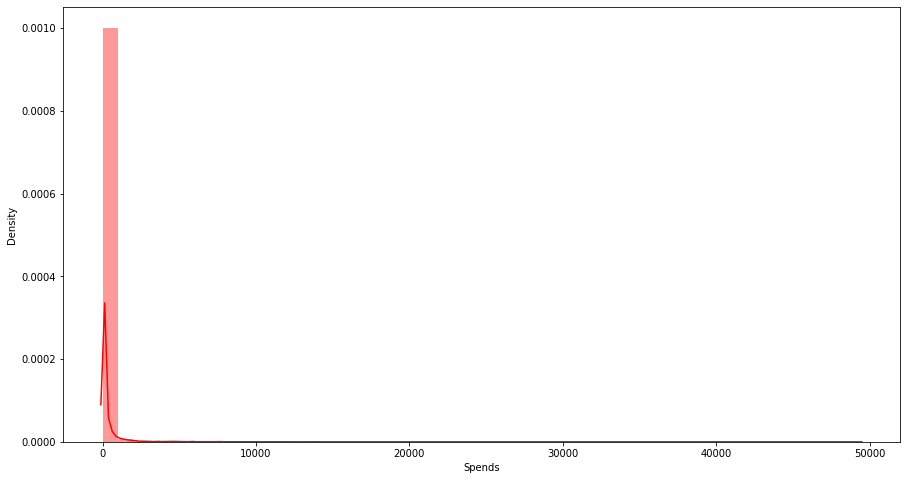

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.distplot(df['spend'], color='red')
plt.xlabel('Spends')
plt.ylabel('Density')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


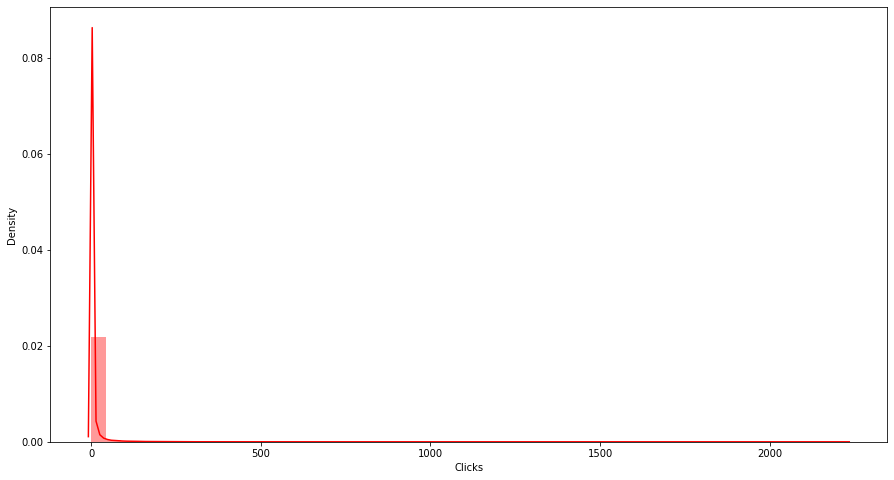

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.distplot(df['clicks'], color='red')
plt.xlabel('Clicks')
plt.ylabel('Density')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


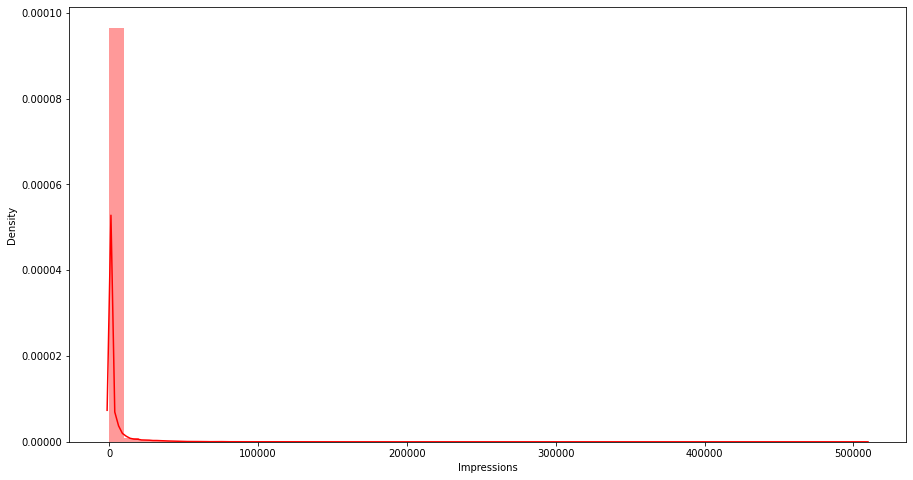

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.distplot(df['impressions'], color='red')
plt.xlabel('Impressions')
plt.ylabel('Density')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


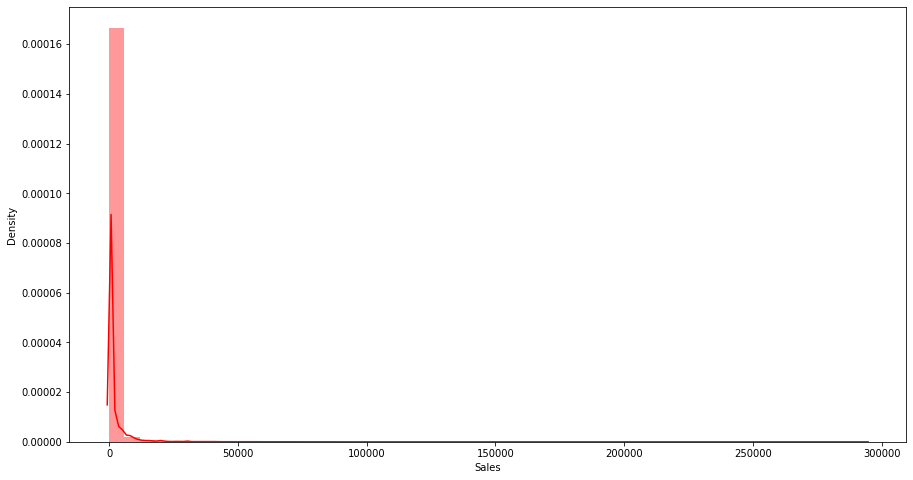

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.distplot(df['sales'], color='red')
plt.xlabel('Sales')
plt.ylabel('Density')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


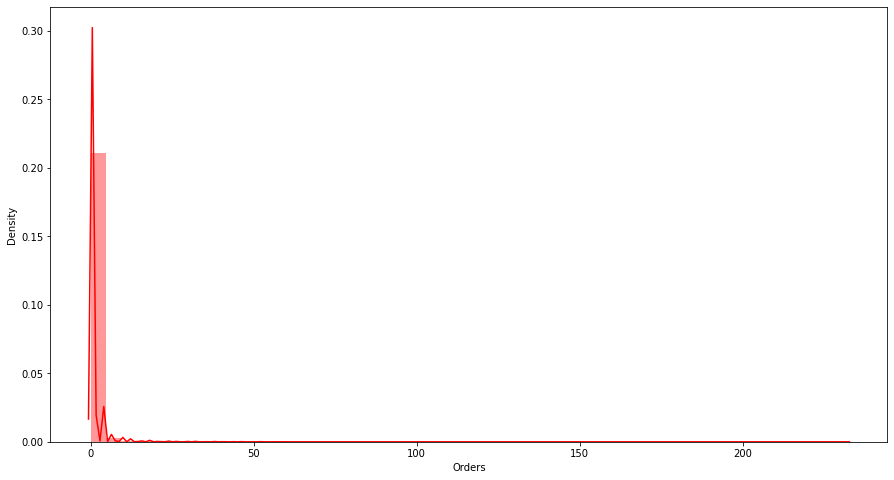

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.distplot(df['orders'], color='red')
plt.xlabel('Orders')
plt.ylabel('Density')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


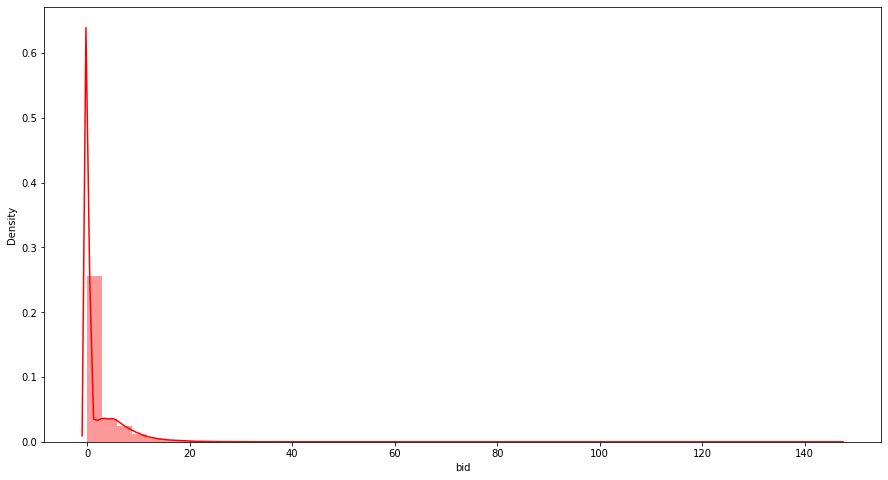

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.distplot(df['bid'], color='red')
plt.xlabel('bid')
plt.ylabel('Density')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


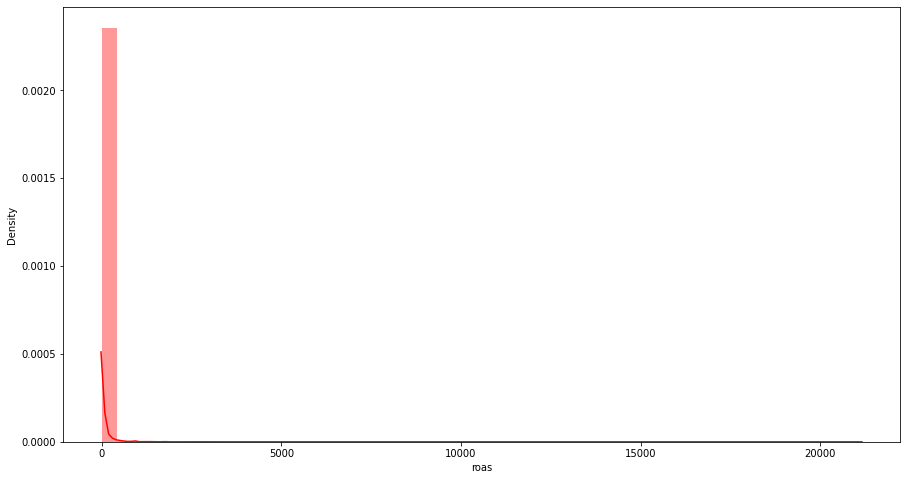

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.distplot(df['roas'], color='red')
plt.xlabel('roas')
plt.ylabel('Density')
plt.show()

### Features are highly imbalance, no one in a Normal Form

## Bivariate Analysis

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


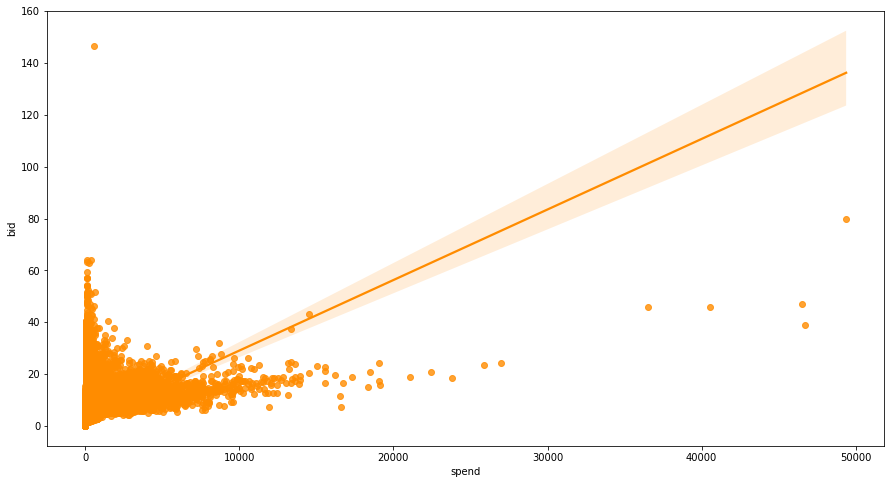

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.regplot(df['spend'],df['bid'],color='darkorange') 
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


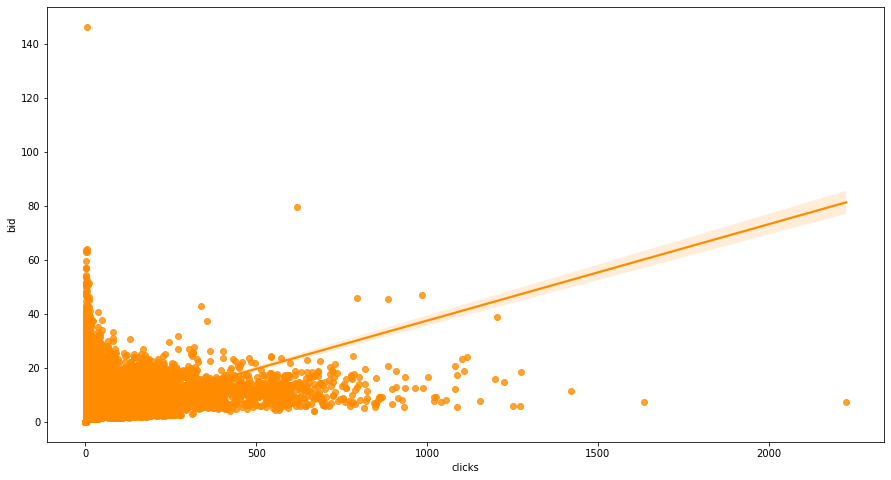

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.regplot(df['clicks'],df['bid'],color='darkorange') 
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


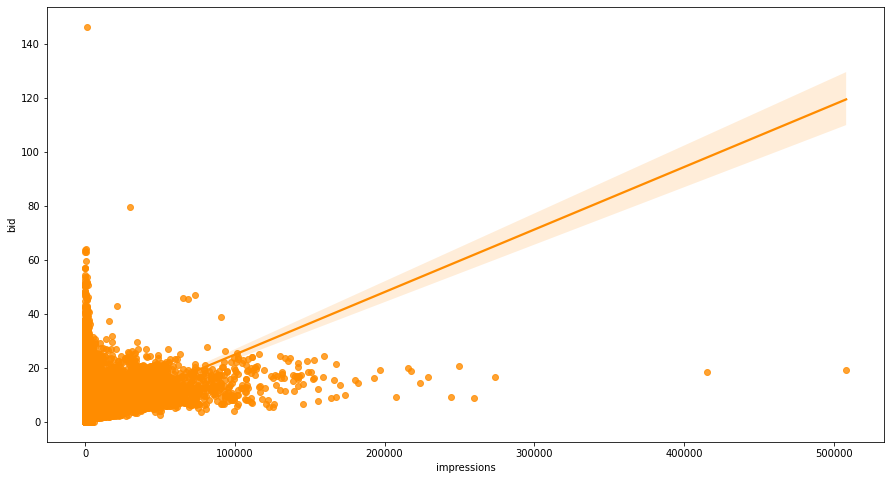

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.regplot(df['impressions'],df['bid'],color='darkorange') 
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


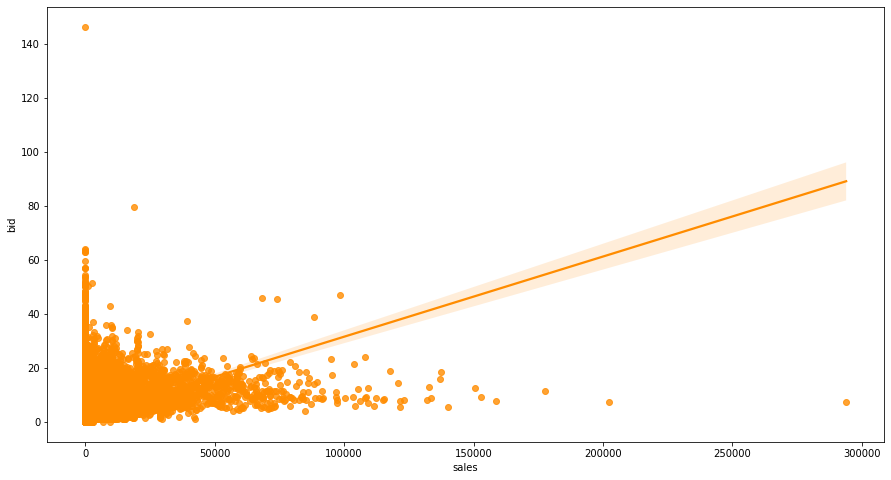

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.regplot(df['sales'],df['bid'],color='darkorange') 
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


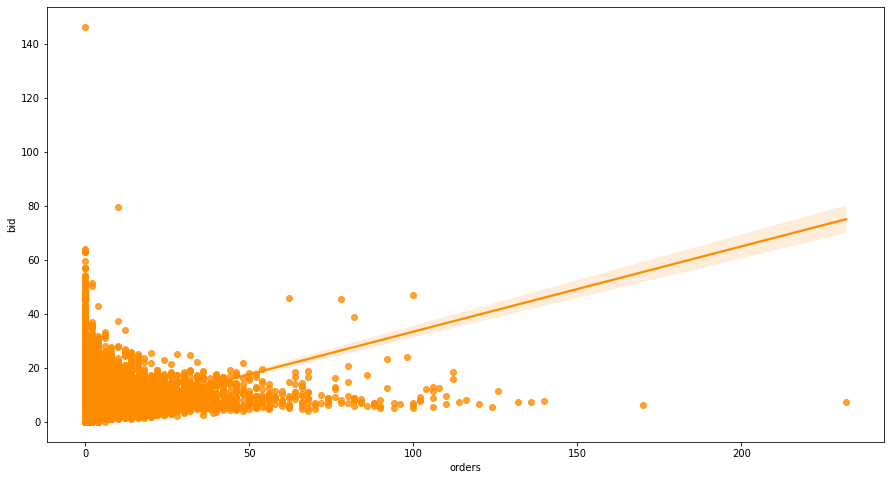

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.regplot(df['orders'],df['bid'],color='darkorange') 
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


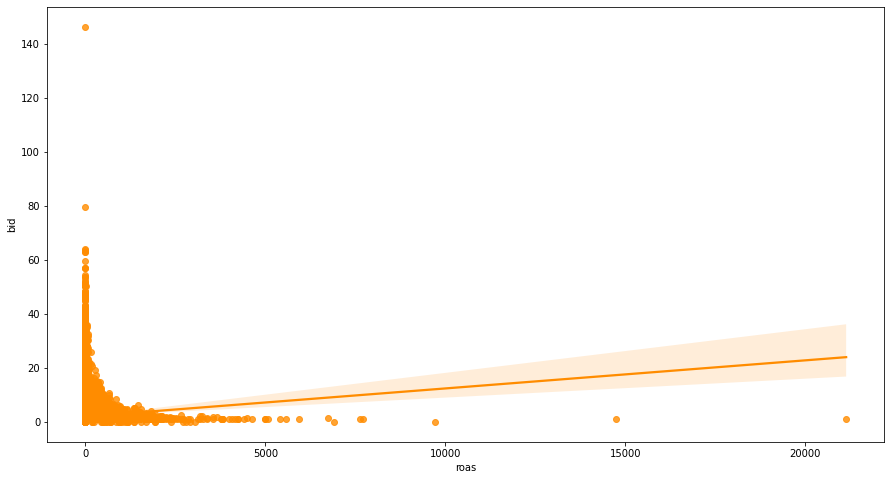

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.regplot(df['roas'],df['bid'],color='darkorange') 
plt.show()

### We can clearly see the data is not linear
### There are plenty of outliers in the data which we can remove also

## Date time Analysis

**Value of Biddings in particulat year, day, time**

There is no significance of plooting for the year beacuse all of the data are from year 2022

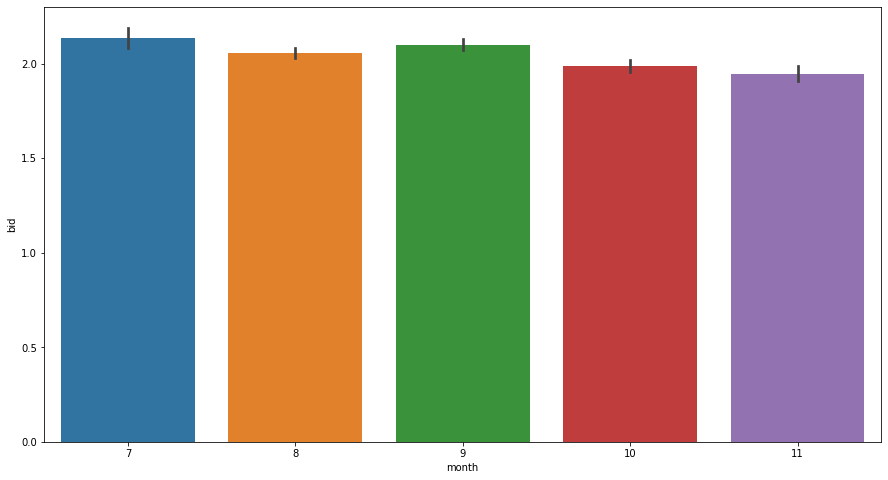

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x='month',y='bid',data=df) 
plt.show()

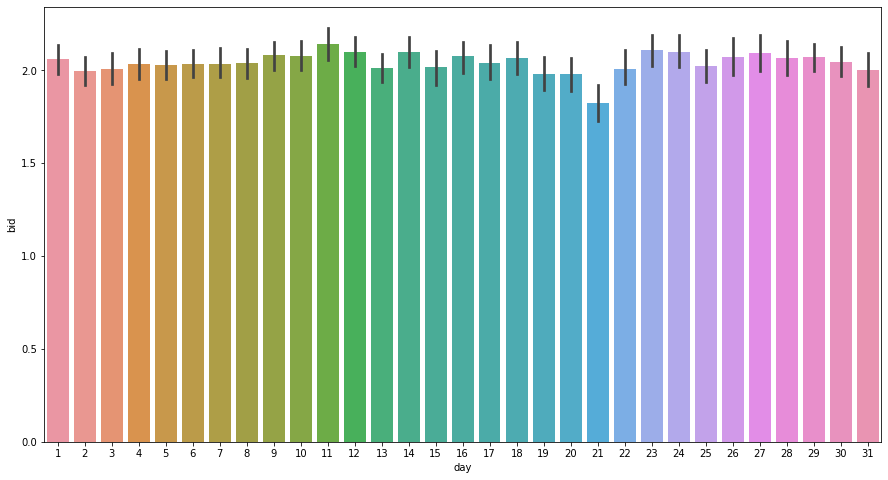

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x='day',y='bid',data=df) 
plt.show()

# Analysis on the basis of ROAS values determing the best product bids

In [ ]:
df['roas'].describe()

count    266273.000000
mean          7.622753
std          97.354533
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       21135.590000
Name: roas, dtype: float64

In [ ]:
roasbins = []
for i in df['roas']:
  if(0<=i<2):
    roasbins.append('Bad')
  if(2<=i<4):
    roasbins.append('Average')
  if(4<=i<=21135.590000):
    roasbins.append('Good')

print(roasbins)

['Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Good', 'Good', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Good', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Good', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Good', 'Good', 'Bad', 'Bad', 'Bad', 'Good', 'Bad', 'Bad', 'Bad'

In [ ]:
df['roasqual'] = roasbins
df.head(20)

spend  clicks  impressions  sales  orders           id  bid  roas  year  \
0     0.0       0            1    0.0       0  60168165092  0.0   0.0  2022   
1     0.0       0            7    0.0       0  60168165092  0.0   0.0  2022   
2     0.0       0            1    0.0       0  60168165092  0.0   0.0  2022   
3     0.0       0            1    0.0       0  60168165092  0.0   0.0  2022   
4     0.0       0            1    0.0       0  60168165092  0.0   0.0  2022   
5     0.0       0            1    0.0       0  60168165092  0.0   0.0  2022   
6     0.0       0            0    0.0       0  60168165092  0.0   0.0  2022   
7     0.0       0            0    0.0       0  60168165092  0.0   0.0  2022   
8     0.0       0            0    0.0       0  60168165092  0.0   0.0  2022   
9     0.0       0            2    0.0       0  60168165092  0.0   0.0  2022   
10    0.0       0            3    0.0       0  60168165092  0.0   0.0  2022   
11    0.0       0            1    0.0       0  60168165092  0.0   0.0  2022   
12    0.0       0           13    0.0       0  60168165092  0.0   0.0  2022   
13    0.0       0            8    0.0       0  60168165092  0.0   0.0  2022   
14    2.0       2            2    0.0       0  60168165092  1.0   0.0  2022   
15    0.0       0            4    0.0       0  60168165092  0.0   0.0  2022   
16    0.0       0            3    0.0       0  60168165092  0.0   0.0  2022   
17    0.0       0            1    0.0       0  60168165092  0.0   0.0  2022   
18    0.0       0           13    0.0       0  60168165092  0.0   0.0  2022   
19    0.0       0            2    0.0       0  60168165092  0.0   0.0  2022   

    month  day roasqual  
0       7   24      Bad  
1       7   29      Bad  
2       7   30      Bad  
3       8    1      Bad  
4       8    3      Bad  
5       8   10      Bad  
6       8   12      Bad  
7       8   13      Bad  
8       8   14      Bad  
9       8   16      Bad  
10      8   21      Bad  
11      8   22      Bad  
12      9    1      Bad  
13      9    2      Bad  
14      9    4      Bad  
15      9    6      Bad  
16      9    9      Bad  
17      9   10      Bad  
18      9   18      Bad  
19      9   22      Bad

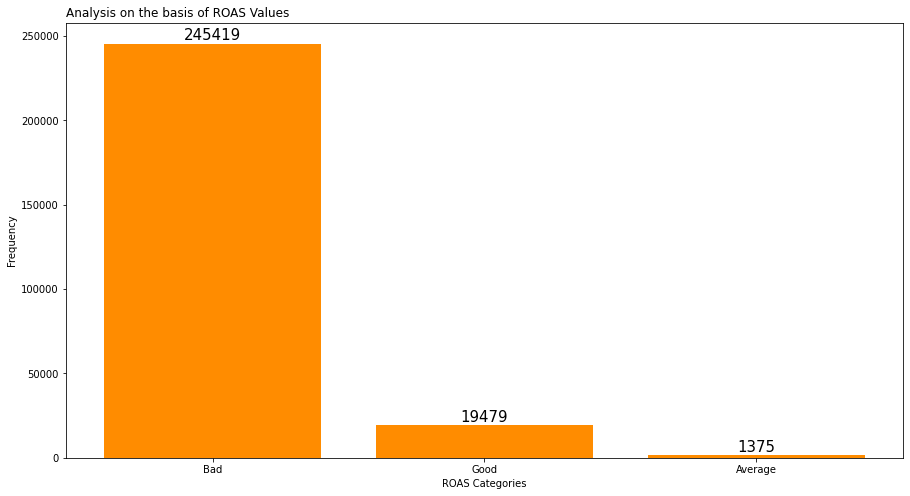

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(df['roasqual'].value_counts().index, df['roasqual'].value_counts().values, color='darkorange')
for bar in ax.patches:
    ax.annotate(s = bar.get_height(),
                  xy = (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  ha='center', 
                  va='center',
                  size=15,
                  xytext=(0, 8),
                  textcoords='offset points')
    
plt.xticks(rotation='horizontal')
ax.set_title('Analysis on the basis of ROAS Values', loc ='left', )
ax.set_ylabel('Frequency')
ax.set_xlabel('ROAS Categories')
plt.show()

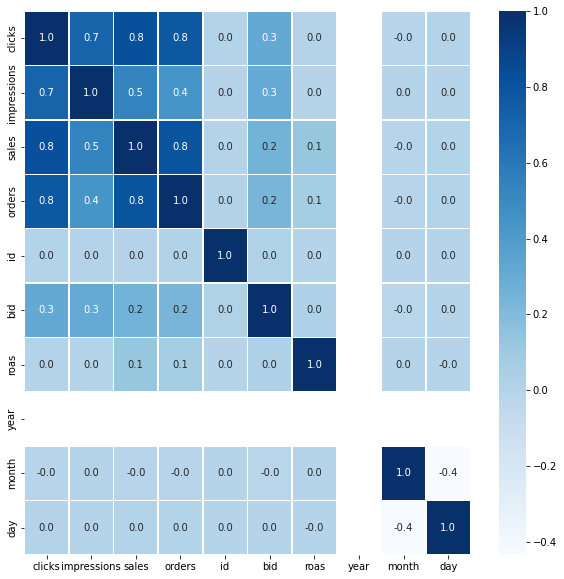

In [ ]:
f, axx = plt.subplots(figsize=(10,10))
sns.heatmap(df.iloc[:,1:].corr(), linewidths=0.5, cmap="Blues", annot=True,fmt=".1f", ax=axx)
plt.show()

# Splitting the data

In [ ]:
X = df.drop(['bid', 'year', 'roasqual'], axis=1)
y = df['bid']
X.head()

spend  clicks  impressions  sales  orders           id  roas  month  day
0    0.0       0            1    0.0       0  60168165092   0.0      7   24
1    0.0       0            7    0.0       0  60168165092   0.0      7   29
2    0.0       0            1    0.0       0  60168165092   0.0      7   30
3    0.0       0            1    0.0       0  60168165092   0.0      8    1
4    0.0       0            1    0.0       0  60168165092   0.0      8    3

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train

spend  clicks  impressions  sales  orders               id  roas  \
165303    0.00       0          567    0.0       0  172655219544141   0.0   
248997    0.00       0            2    0.0       0  259938156239473   0.0   
14824     0.00       0           20    0.0       0   16408396585120   0.0   
70516     0.00       0            2    0.0       0   77039051544161   0.0   
95723     0.00       0            2    0.0       0  100850139641021   0.0   
...        ...     ...          ...    ...     ...              ...   ...   
119879    0.00       0           17    0.0       0  125527239752848   0.0   
259178    0.00       0           25    0.0       0  273918540340710   0.0   
131932   59.92       8         1126    0.0       0  137259903697448   0.0   
146867  716.28      39         4554    0.0       0  152431023092839   0.0   
121958    3.80       2           24    0.0       0  127609918556874   0.0   

        month  day  
165303      9   20  
248997     10   13  
14824       8   11  
70516       8   25  
95723      10   16  
...       ...  ...  
119879     11   14  
259178     10    6  
131932      8   19  
146867      9   13  
121958     10   18  

[186391 rows x 9 columns]

In [ ]:
X_train.shape

(186391, 9)

In [ ]:
X_test.shape

(79882, 9)

In [ ]:
y_train

165303     0.000000
248997     0.000000
14824      0.000000
70516      0.000000
95723      0.000000
            ...    
119879     0.000000
259178     0.000000
131932     7.490000
146867    18.366154
121958     1.900000
Name: bid, Length: 186391, dtype: float64

In [ ]:
y_train.shape

(186391,)

In [ ]:
y_test.shape

(79882,)

In [ ]:
y_test.describe()

count    79882.000000
mean         2.050514
std          4.009709
min          0.000000
25%          0.000000
50%          0.000000
75%          2.897188
max        146.490000
Name: bid, dtype: float64

# Standardization of the data

In [ ]:
pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

# Metrics

In [ ]:
def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

# Model Building

## Linear Regression

In [ ]:
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [ ]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

Test set evaluation:
_____________________________________
MAE: 2.5830062198970656
MSE: 14.270951955292993
RMSE: 3.777691352571434
R2 Square 0.11236866613077656
__________________________________
Train set evaluation:
_____________________________________
MAE: 2.5738778885510403
MSE: 13.749697131415115
RMSE: 3.708058404531287
R2 Square 0.12232774280331582
__________________________________


## Robust Regression

In [ ]:
model = RANSACRegressor(base_estimator=LinearRegression(), max_trials=100)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Robust Regression", *evaluate(y_test, test_pred) , cross_val(RANSACRegressor())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 2.0505136704061346
MSE: 20.282172989991217
RMSE: 4.503573357900503
R2 Square -0.26152006686526774
__________________________________
Train set evaluation:
_____________________________________
MAE: 2.043666378959745
MSE: 19.842667463674264
RMSE: 4.454510911836929
R2 Square -0.26659944398744817
__________________________________


## Ridge Regression

In [ ]:
model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 2.58300406172946
MSE: 14.270669173408033
RMSE: 3.7776539245155893
R2 Square 0.1123862547305089
__________________________________
Train set evaluation:
_____________________________________
MAE: 2.573881061677374
MSE: 13.749698119629597
RMSE: 3.708058537783566
R2 Square 0.12232767972349456
__________________________________


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.03696e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.76489e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.60827e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.52917e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-condit

## Laso Regresssion

In [ ]:
model = Lasso(alpha=0.1, 
              precompute=True, 
#               warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 2.6000799065487588
MSE: 14.281154194873984
RMSE: 3.779041438628847
R2 Square 0.11173410246914428
__________________________________
Train set evaluation:
_____________________________________
MAE: 2.5917070693812065
MSE: 13.785687895316183
RMSE: 3.7129082799493154
R2 Square 0.12003037620030077
__________________________________


## Elastic Net

In [ ]:
model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(y_test, test_pred) , cross_val(ElasticNet())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 2.598787014318583
MSE: 14.279506700799418
RMSE: 3.778823454568818
R2 Square 0.11183657407492997
__________________________________
Train set evaluation:
_____________________________________
MAE: 2.590433803614821
MSE: 13.784539307541351
RMSE: 3.71275360178148
R2 Square 0.12010369298795731
__________________________________


## Polynomial Regression

In [ ]:
poly_reg = PolynomialFeatures(degree=2)

X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train_2_d,y_train)

test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Polynomail Regression", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


Test set evaluation:
_____________________________________
MAE: 2.405233889086816
MSE: 13.392717679640874
RMSE: 3.659606219204585
R2 Square 0.1669934917197683
__________________________________
Train set evaluation:
_____________________________________
MAE: 2.3946420272497284
MSE: 12.433853674582453
RMSE: 3.5261669947100427
R2 Square 0.2063208144933938
__________________________________


## Stochastic Gradient Descent

In [ ]:
sgd_reg = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
sgd_reg.fit(X_train, y_train)

test_pred = sgd_reg.predict(X_test)
train_pred = sgd_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Stochastic Gradient Descent", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 2.5833286930082844
MSE: 14.270198644369794
RMSE: 3.7775916460583447
R2 Square 0.11241552091535378
__________________________________
Train set evaluation:
_____________________________________
MAE: 2.5742138142542763
MSE: 13.749717633332198
RMSE: 3.708061169038639
R2 Square 0.12232643412257393
__________________________________


## Artficial Neural Network

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

model = Sequential()

model.add(Dense(X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1))

model.compile(optimizer=Adam(0.00001), loss='mse')

r = model.fit(X_train, y_train,
              validation_data=(X_test,y_test),
              batch_size=1,
              epochs=8)

Epoch 1/8
186391/186391 [==============================] - 645s 3ms/step - loss: 12.7156 - val_loss: 9.2807
Epoch 2/8
186391/186391 [==============================] - 572s 3ms/step - loss: 7.2105 - val_loss: 6.4827
Epoch 3/8
186391/186391 [==============================] - 524s 3ms/step - loss: 5.7588 - val_loss: 5.7033
Epoch 4/8
186391/186391 [==============================] - 578s 3ms/step - loss: 5.2302 - val_loss: 5.3187
Epoch 5/8
186391/186391 [==============================] - 585s 3ms/step - loss: 4.8813 - val_loss: 4.9696
Epoch 6/8
186391/186391 [==============================] - 540s 3ms/step - loss: 4.4705 - val_loss: 4.5316
Epoch 7/8
186391/186391 [==============================] - 548s 3ms/step - loss: 4.0552 - val_loss: 3.9569
Epoch 8/8
186391/186391 [==============================] - 559s 3ms/step - loss: 3.8092 - val_loss: 3.5904


Only train for 8 Epochs because of the hardware constraints

In [ ]:
!pip install hvplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import hvplot.pandas  
pd.DataFrame({'True Values': y_test, 'Predicted Values': pred}).hvplot.scatter(x='True Values', y='Predicted Values')

:Scatter   [True Values]   (Predicted Values)

In [ ]:
pd.DataFrame(r.history)

loss  val_loss
0  12.715630  9.280715
1   7.210498  6.482713
2   5.758793  5.703285
3   5.230209  5.318737
4   4.881341  4.969552
5   4.470466  4.531581
6   4.055222  3.956872
7   3.809156  3.590406

In [ ]:
pd.DataFrame(r.history).hvplot.line(y=['loss', 'val_loss'])

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [ ]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Artficial Neural Network", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)

5825/5825 [==============================] - 14s 2ms/step
Test set evaluation:
_____________________________________
MAE: 0.7152717776099137
MSE: 3.590695865440433
RMSE: 1.8949131551183112
R2 Square 0.7766642218021425
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.7142674809684586
MSE: 3.6850840843263275
RMSE: 1.9196572830394303
R2 Square 0.7647732866158492
__________________________________


## Random Forest Regressor

In [ ]:
rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 0.008631491306643937
MSE: 0.11826729393369079
RMSE: 0.3439001220320964
R2 Square 0.9926439556242406
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.0030157684838679104
MSE: 0.003491678606899244
RMSE: 0.0590904273711
R2 Square 0.9997771187674148
__________________________________


# Comparison of Models

In [ ]:
results_df

Model       MAE        MSE      RMSE  R2 Square  \
0            Linear Regression  2.583006  14.270952  3.777691   0.112369   
1            Robust Regression  2.050514  20.282173  4.503573  -0.261520   
2             Ridge Regression  2.583004  14.270669  3.777654   0.112386   
3             Lasso Regression  2.600080  14.281154  3.779041   0.111734   
4        Polynomail Regression  2.405234  13.392718  3.659606   0.166993   
5  Stochastic Gradient Descent  2.583329  14.270199  3.777592   0.112416   
6     Artficial Neural Network  0.715272   3.590696  1.894913   0.776664   
7      Random Forest Regressor  0.008631   0.118267  0.343900   0.992644   

   Cross Validation  
0          0.096446  
1         -0.267372  
2          0.096446  
3          0.095493  
4          0.000000  
5          0.000000  
6          0.000000  
7          0.000000

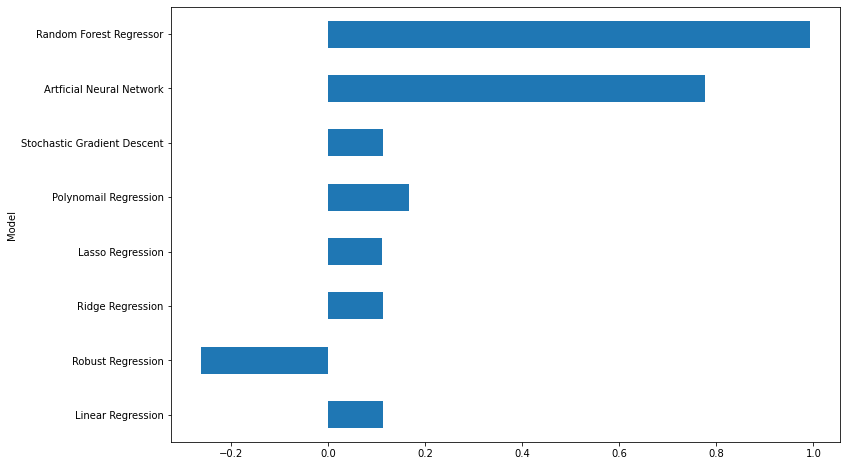

In [ ]:
results_df.set_index('Model', inplace=True)
results_df['R2 Square'].plot(kind='barh', figsize=(12, 8))

**Random forest and Neural Network has best score**

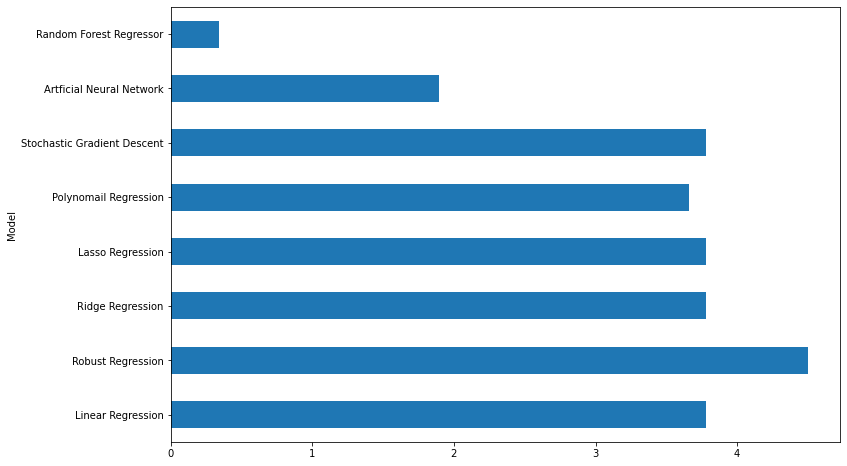

In [ ]:
results_df['RMSE'].plot(kind='barh', figsize=(12, 8))

**Random Forest Regressor has least RMSE Error**

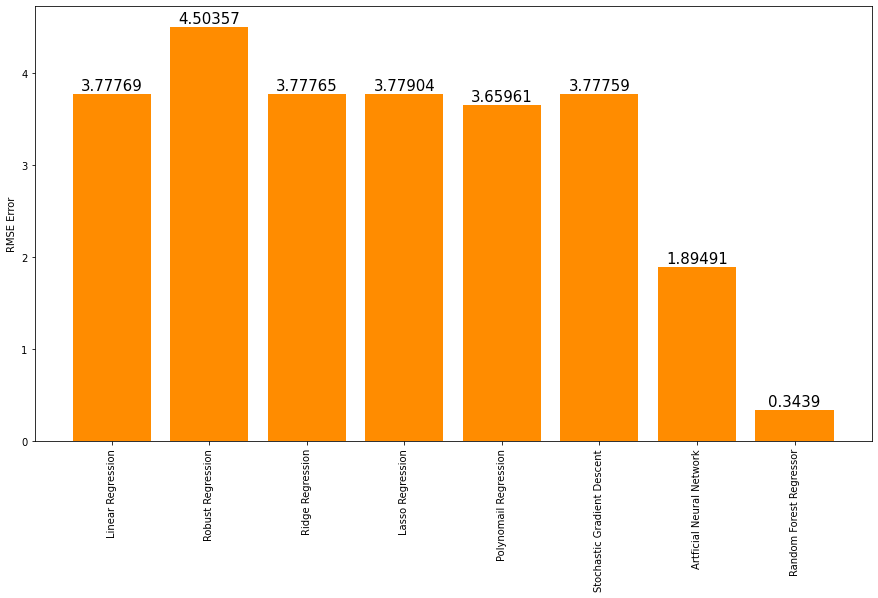

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(results_df['RMSE'].index, np.round(results_df['RMSE'].values, 5), color='darkorange')
for bar in ax.patches:
    ax.annotate(s = bar.get_height(),
                  xy = (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  ha='center', 
                  va='center',
                  size=15,
                  xytext=(0, 8),
                  textcoords='offset points')

ax.set_ylabel('RMSE Error')  
plt.xticks(rotation='vertical')
plt.show()

**We will get better reults from ANN but because of GPU Constraints, I didn't train for more epochs**